<a href="https://colab.research.google.com/github/soulayman-al-abdallah/Data-Science-Projects/blob/main/M02_Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## 1. Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# clone git repo
!git clone https://github.com/zaka-ai/medical-cost-prediction

# change working directory
%cd medical-cost-prediction/data/

Cloning into 'medical-cost-prediction'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.
/content/medical-cost-prediction/data


In [3]:
# read CSV file in Pandas
data = pd.read_csv('insurance.csv')

# display first 10 rows
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

In [4]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of charges

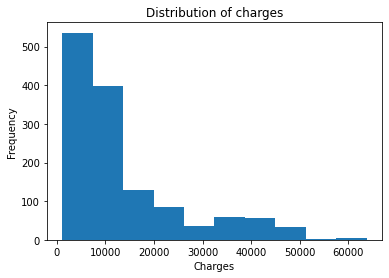

In [7]:
# plotting the histogram of the charges to see their distribution

data["charges"].plot(kind="hist")
plt.title("Distribution of charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()



---



#### Correlation between smoking and cost of treatment

Let's see if smokers spend more or less on treatment than non-smokers!

In [8]:
#Since 'smoker' is categorical not continuous, so we'll devide the samples based o it, and compare the charges of each alone

# select smokers 
smokers = data[(data.smoker == "yes")]

# select non smokers
non_smokers = data[(data.smoker == "no")]

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


Now let's plot the charges for both.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

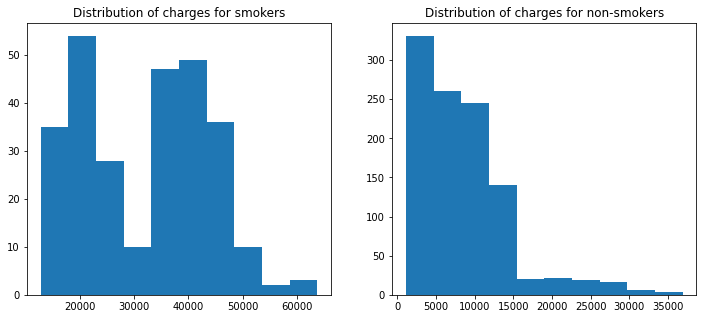

In [9]:
# create the figure
fig = plt.figure(figsize=(12,5))

# add first sub plot for smokers
ax = fig.add_subplot(121)
# draw distribution of charges for smokers
ax.hist(smokers["charges"])
# set sub plot title
ax.set_title('Distribution of charges for smokers')

# add second sub plot for non smokers
ax = fig.add_subplot(122)
# draw distribution of charges for non-smokers
ax.hist(non_smokers["charges"])
# set sub plot title
ax.set_title('Distribution of charges for non-smokers')

 ▶ *We can see that:*
 
Smoking patients spend more on treatment.



---



#### Correlation between age and cost of treatment

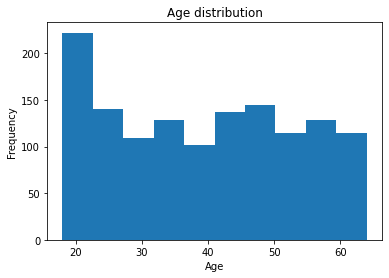

In [ ]:
# plot histogram for age distribution to see their distribution
plt.hist(data["age"])
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Let's plot the correlation between age and cost of treatment

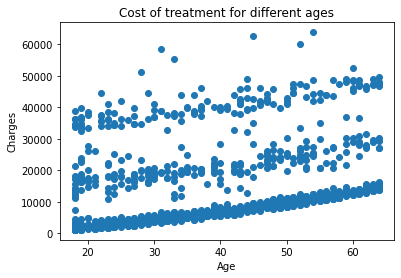

In [10]:
# drawing a scatter plot to show correlation between age and charges
plt.scatter(data["age"], data["charges"])
plt.title("Cost of treatment for different ages")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

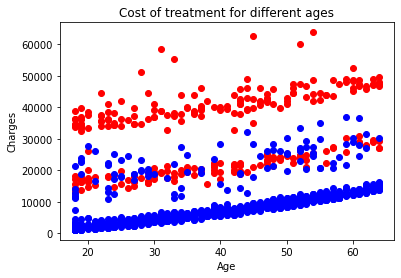

In [11]:
#Drawing a scatter plot with the correlation between age and cost of treatment while showing smokers in red and non-smokers in blue

plt.scatter(smokers["age"], smokers["charges"], color='r')
plt.scatter(non_smokers["age"], non_smokers["charges"], color='b')
plt.title("Cost of treatment for different ages")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

#my solution
# color={'yes' : 'red', 'no': 'blue'}
# plt.scatter(data["age"], data["charges"], c=data.smoker.map(color), marker='o',linewidth=1, alpha=0.5)
# plt.xlabel("age")
# plt.ylabel("charges")
# plt.title('Bubble plot showing relation across smoking and age with the charges')
# plt.show()

 ▶ *We can see that:*
 
 The charges slightly increase with age



---



#### Correlation between BMI and cost of treatment

First, let's look at the distribution of BMI in our dataset, and then look at how it affects the cost of treatment.

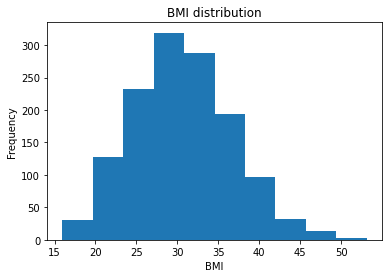

In [12]:
# drawing a histogram to show the distribution of BMI
data["bmi"].plot(kind="hist")
plt.title("BMI distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


Obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment. 

In [13]:
# select obese people
obese = data[(data["bmi"] >= 30)]
# select overweight people
overweight = data[(data["bmi"] >= 25) & (data["bmi"] < 30)]
# select healthy people 
healthy = data[(data["bmi"] < 25) & (data["bmi"] >= 18 )]
# select underweight people 
underweight = data[(data["bmi"] < 18 )]

print('There are {} obese, {} overweight, {} healthy, and {} underweight individuals.'.format(obese.shape[0], overweight.shape[0], healthy.shape[0], underweight.shape[0]))

There are 705 obese, 385 overweight, 230 healthy, and 15 underweight individuals.


To compare, let's plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot, while showing `obese` data in red, `overweight` data in yellow and `healthy` data in green.

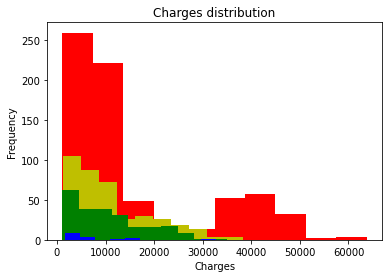

In [ ]:
# plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot,
# while showing obese data in red, overweight data in yellow and healthy data in green.

plt.hist(obese["charges"], color='r')
plt.hist(overweight["charges"], color='y')
plt.hist(healthy["charges"], color='g')
plt.hist(underweight["charges"], color='b')
plt.title("Charges distribution")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

 ▶ *We can see that:*


Patients with BMI above 30 spend more on treatment!

## 3. Data Preprocessing
"Garbage in, garbage out". 

In [14]:
# print how many missing value in each column
data.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# drop rows with missing values
data = data.dropna()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB




---



#### Remove unused columns

In [17]:
# dropping the region feature since we don't really care about it
data.drop("region", axis=1, inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520




---



#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [18]:
# define dictionary 
gender = {'male':0, 'female':1}
# replace sex column with 0/1
data['sex'] = data['sex'].apply(lambda x: gender[x])
# print head to verify
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,yes,16884.92400
1,18,0,33.770,1,no,1725.55230
2,28,0,33.000,3,no,4449.46200
3,33,0,22.705,0,no,21984.47061
4,32,0,28.880,0,no,3866.85520


And now the smokers column

In [19]:
# define dictionary 
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])
# print head to verify
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520




---



#### Normalization

Let's scale all the columns by dividing by the maximum

In [20]:
# get the max of each column
data_max = data.max()
data_max

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
charges     63770.42801
dtype: float64

In [21]:
# divide each column by its maximum value
data = data.divide(data_max)
data.describe()

,age,sex,bmi,children,smoker,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




---


---




## 4. MultiLinear Regression Model Training



#### Data splits

Before training, we need to split data into training (80%) & testing (20%)

In [23]:
# store all columns except last one as inputs in X
X = data.iloc[:,0:-1].values
# store the last column as the output (label) in y  
y = data.iloc[:,-1].values  

# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 5) (1068,)
(267, 5) (267,)




---



### Prediction Using Scikit Learn Library


In [24]:
# define our regression model
model = LinearRegression()  

# train our model
model.fit(x_train, y_train)
print('Model trained!')

Model trained!




---



####Features importance (Coefficients)


[0.25340124 0.00636305 0.24684219 0.04254233 0.3666139 ]


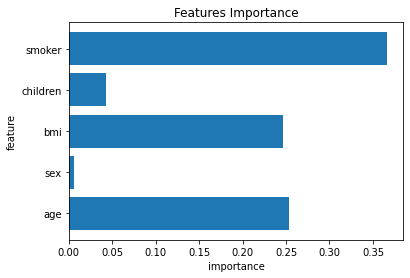

In [25]:
columns_names = data.columns[0:-1].values
features_importance = model.coef_
print(features_importance)
plt.barh(columns_names, features_importance)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()



---



####Evaluation using Scikit learn

We start by calculating the predicted values for this model.

In [26]:
y_pred = model.predict(x_test)

Now we will evaluate the sklearn model using the sklearn library to get error metrics.

In [27]:
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 0.06613709621551409
Mean Squared Error (MSE): 0.008402410307189204
Root Mean Squared Error (RMSE): 0.09166466225972364
